# OPEN AI GYM


In [11]:
%matplotlib inline

import numpy as np
# import torch
import matplotlib.pyplot as plt
from agent import Agent
from monitor import interact
import gym
import numpy as np

In [22]:

# results:
# nA=6, alpha=0.1, epsilon=0.1, gamma=0.9   -> Episode 20000/20000 || Best average reward 5.646
# nA=6, alpha=0.1, epsilon=0.1, gamma=0.75  -> Episode 20000/20000 || Best average reward 5.737
# nA=6, alpha=0.1, epsilon=0.1, gamma=0.6   -> Episode 20000/20000 || Best average reward 5.675

# nA=6, alpha=0.1, epsilon=0.05, gamma=0.75 -> Episode 20000/20000 || Best average reward 7.832
# nA=6, alpha=0.1, epsilon=0.05, gamma=0.9  -> Episode 20000/20000 || Best average reward 7.564

# nA=6, alpha=0.1, epsilon=0.01, gamma=0.9  -> Episode 20000/20000 || Best average reward 8.94
# nA=6, alpha=0.1, epsilon=0.01, gamma=0.75 -> Episode 20000/20000 || Best average reward 9.392
# nA=6, alpha=0.1, epsilon=0.01, gamma=0.6  -> Episode 20000/20000 || Best average reward 8.95
### more realistic for 2 lines above:
# nA=6, alpha=0.1, epsilon=0.01, gamma=0.75 -> 9.075999999999999 over 5 tries

# nA=6, alpha=0.25, epsilon=0.01, gamma=0.9 -> 9.065999999999999 over 5 tries
# nA=6, alpha=0.25, epsilon=0.01, gamma=0.75-> 8.970000000000002 over 5 tries
# nA=6, alpha=0.5, epsilon=0.01, gamma=0.75 -> 9.056000000000001 over 5 tries
# nA=6, alpha=0.75, epsilon=0.01, gamma=0.75-> 8.895999999999999 over 5 tries
# epsilon:
#epsilon = 1 - max(self.epsilon, 1 / self.episode_cntr)
#########################################################################################
# epsilon decay by 25% every 1000 episodes after min epsilon is reached
# nA=6, alpha=0.1, epsilon=0.01, gamma=0.75 -> 9.044 over 5 tries
################ Taxi-V3 ################################################################
# epsilon decay by 90% every 500 episodes after min epsilon is reached -> 8.598 over 5 tries
# nA=6, alpha=0.1, epsilon=0.01, gamma=0.9 

# epsilon decay by 90% every 500 episodes after min epsilon is reached -> 8.53 over 5 tries
# nA=6, alpha=0.1, epsilon=0.01, gamma=0.75

# epsilon decay by 90% every 500 episodes after min epsilon is reached -> 8.495999999999999 over 5 tries
# learning rate decay by 50% every 1000 episodes after 8k episodes
# nA=6, alpha=0.1, epsilon=0.01, gamma=0.9

env = gym.make('Taxi-v3')
print(env)
# agent = Agent(nA=6, alpha=0.1, epsilon=0.01, gamma=0.9)

bestAvgRewards = []
for i in range(5):
    agent = Agent(nA=6, alpha=0.5, epsilon=0.01, gamma=0.9)
    avg_rewards, best_avg_reward = interact(env, agent)
    bestAvgRewards.append(best_avg_reward)

print('-'*100)
print(f"{ np.mean(bestAvgRewards) } over 5 tries")

<TimeLimit<TaxiEnv<Taxi-v3>>>
Episode 20000/20000 || Best average reward 8.439

Episode 20000/20000 || Best average reward 8.552

Episode 20000/20000 || Best average reward 8.993

Episode 20000/20000 || Best average reward 8.596

Episode 20000/20000 || Best average reward 8.565

----------------------------------------------------------------------------------------------------
8.624 over 5 tries


In [76]:
env = gym.make('Taxi-v3')
print(env)
# agent = Agent(nA=6, alpha=0.1, epsilon=0.01, gamma=0.9)

bestRewards = []
avgRewards = []
for i in range(5):
    agent = Agent(nA=6, alpha=0.65, epsilon=0.01, gamma=0.9)
    avg_rewards, best_avg_reward = interact(env, agent)
    bestRewards.append(best_avg_reward)
    avgRewards.append(avg_rewards)


print('-'*100)
print(f"{ np.mean(bestAvgRewards) } over 5 tries")

<TimeLimit<TaxiEnv<Taxi-v3>>>
Episode 20000/20000 || Best average reward 8.368

Episode 20000/20000 || Best average reward 8.419

Episode 20000/20000 || Best average reward 8.398

Episode 20000/20000 || Best average reward 8.391

Episode 20000/20000 || Best average reward 8.317

----------------------------------------------------------------------------------------------------
8.44 over 5 tries


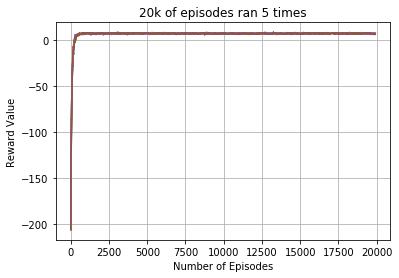

In [73]:
avgRewards = np.asarray(avgRewards, dtype=np.float32)
x = [ i + 1 for i in range(avgRewards[0].size)]
fig, ax = plt.subplots()
ax.plot(x, y)
for y in avgRewards:
    ax.plot(x, y)
ax.set(xlabel='Number of Episodes', ylabel='Reward Value',
       title='20k of episodes ran 5 times')
ax.grid()
# fig.savefig("training_rates.png")
plt.show()

(5,)


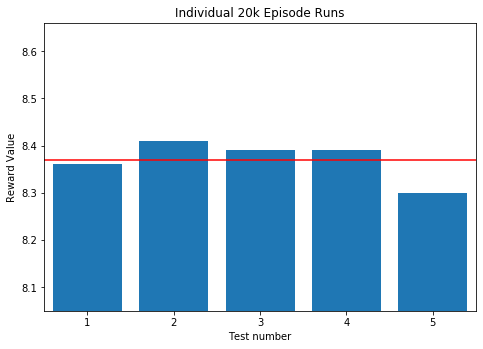

In [108]:
bestRewards = np.asarray(bestRewards, dtype=np.float32)
print(bestRewards.shape)
x = [i + 1 for i in range(bestRewards.shape[0])]
y = bestRewards
mean = np.mean(y)
mean_y = np.empty(len(x) + 2)
mean_y.fill(mean)
mean_x = [ i for i in range(len(x) + 2)]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set(xlim=(0.5, x[-1] + 0.5), ylim=(min(y) - 0.25, max(y) + 0.25))
ax.bar(x,y)
ax.plot(mean_x, mean_y, color='red')
ax.set(xlabel='Test number', ylabel='Reward Value',
       title='Individual 20k Episode Runs')
fig.savefig("individual_20k_episode_runs.png")
plt.show()